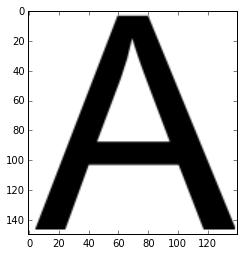

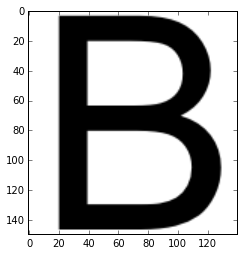

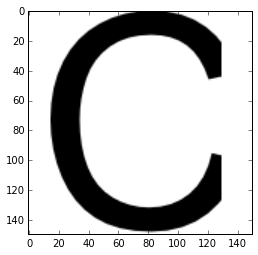

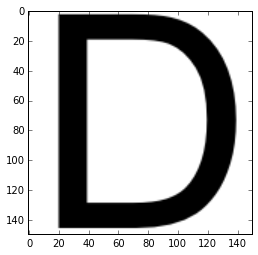

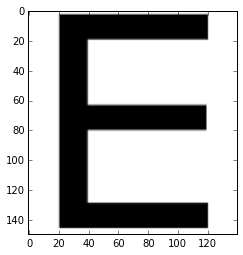

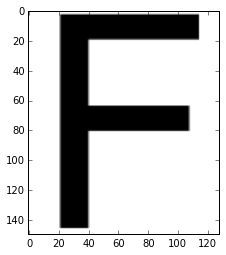

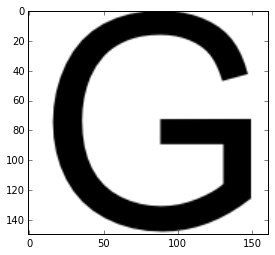

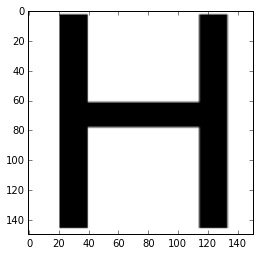

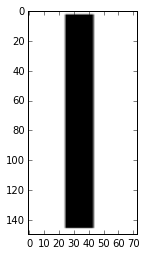

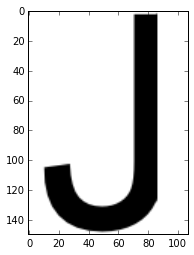

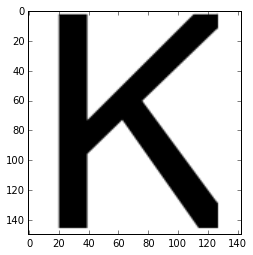

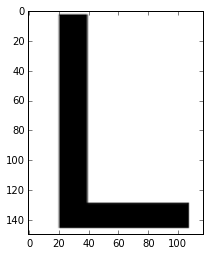

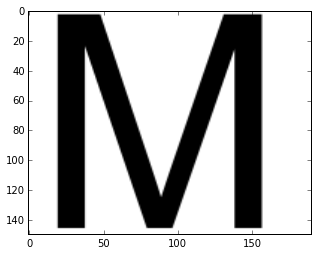

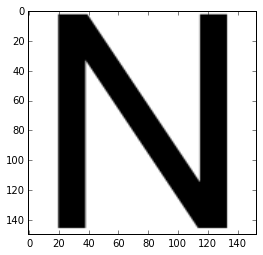

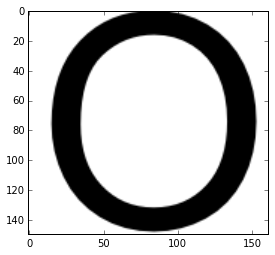

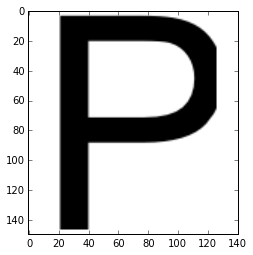

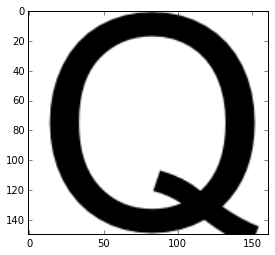

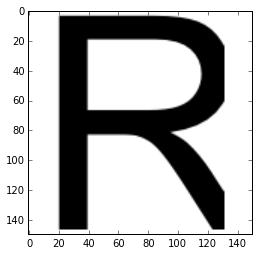

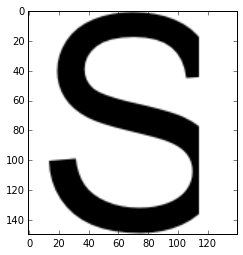

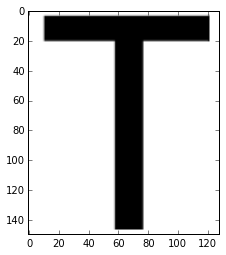

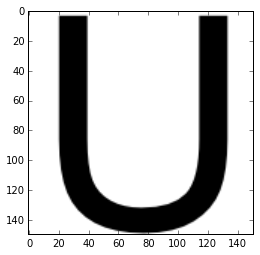

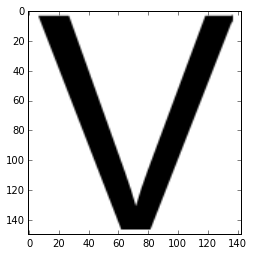

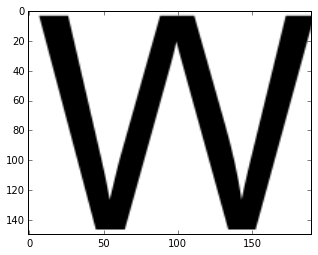

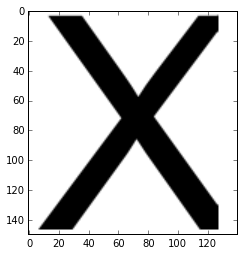

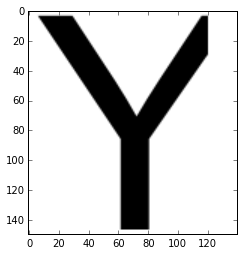

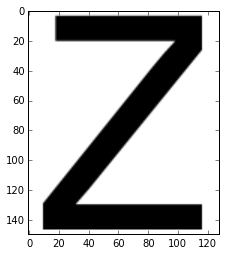

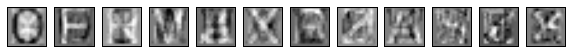

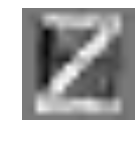

In [48]:
"""
    The following program prepares images of the english alphabet by cropping unnecessarythe images for Principle component
    analysis.  The program then resamples the images onto a coraser grid so that each image has 16x16 pixels.  From this,
    the program displays the cropped images of the alphabet.  The program, further, creates a 2d-array, and performs PCA on it,
    resulting in a PCA constructed letter from n_comp eigenimages.
"""

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from skimage import transform, data, io
from scipy.interpolate import interp2d
from sklearn.decomposition import PCA

def make_let_im(let_file, dim=16, ylo=70, yhi=220, xlo=10, xhi=200, edge_pix=150, plot_let=False):
    letter = mpimg.imread(let_file)
    
    letter = letter[ylo:yhi, xlo:xhi, 0]
    
    for i in range(letter.shape[1]):
        if letter[0:edge_pix, i].any() == 0:
            letter[0:edge_pix, i] = 1
    
    plt.imshow(letter, cmap='gray')
    plt.grid('off')
    plt.show()
    
    x = np.arange(letter.shape[1])
    y = np.arange(letter.shape[0])
    
    f2d = interp2d(x, y, letter)
    
    x_new = np.linspace(0, letter.shape[1], dim)
    y_new = np.linspace(0, letter.shape[0], dim)
    
    letter_new = f2d(x_new, y_new)
    letter_new -= np.mean(letter_new)
    
    letter_flat = letter_new.flatten()
    
    if plot_let:
        plt.imshow(letter_new, cmap = 'gray')
        plt.grid('off')
        plt.show()
    
    return letter_new, letter_flat

def alphabet_pca(X, n_comp=5):
    pca = PCA(n_comp)
    Xproj = pca.fit_transform(X)
    pca_comps = pca.components_
    
    return pca, Xproj, pca_comps

def show_pca_im(Xproj, pca_comps, dim=16, let_idx=0):
    n_comp = pca_comps.shape[0]
    f, axes = plt.subplots(1, n_comp, figsize = (10, 2), subplot_kw=dict(xticks=[], yticks=[]))
    for i in range(n_comp):
        axes[i].imshow(pca_comps[i].reshape((dim, dim)), cmap='binary')
    
    dig_im = np.zeros((dim, dim))
    coeffs = Xproj[let_idx]
    for i in range(n_comp):
        dig_im += coeffs[i]*pca_comps[i].reshape((dim, dim))
    
    fig, ax = plt.subplots(1, 1, figsize = (2, 2))
    ax.imshow(dig_im, cmap='binary')
    ax.grid(False)
    ax.axis('off')
    plt.show()

####################################################################################################
if __name__ == "__main__":
    import doctest
    import argparse
    
    parser = argparse.ArgumentParser()
    parser.add_argument('-let_idx', type=int)
    parser.add_argument('-n_comp', type=int)
    args = parser.parse_args()
    
    let_idx = args.let_idx
    n_comp = args.n_comp
    
    i = 0
    X = np.zeros((26,256))
    while i < 26:
        filename = 'letter'+chr(65+i)+'.png'
        letter, letter_flat = make_let_im(filename)
        X[i,] = letter_flat
        i += 1

    pca, Xproj, pca_comps = alphabet_pca(X, n_comp=n_comp)
    show_pca_im(Xproj, pca_comps, let_idx=let_idx)

((26,), (26,))


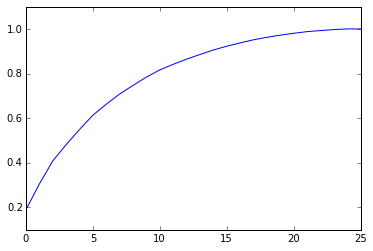

In [46]:
Xproj = pca.fit_transform(X)

x = pca.explained_variance_ratio_
y = np.cumsum(x)

print(x.shape, y.shape)

plt.plot(np.arange(26), y)
plt.show()